[link text](https://)# Import Libraries

# The Titanic Dataset Analysis explores passenger survival patterns from the tragic 1912 Titanic disaster. Using data analytics and visualisation techniques, the analysis examines key factors influencing survival rates, such as passenger class, age, gender, fare, and embarkation point. Statistical methods, Python (Pandas, Matplotlib, Seaborn), and Machine Learning models are applied to uncover insights and predict survival probabilities. This study highlights the impact of socio-economic status and demographics on survival outcomes, offering valuable insights into historical data interpretation and predictive modelling. Various procedures for pre-processing the data will be followed, a few interetsing EDA techniques.**bold text**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/Colab"

[Errno 2] No such file or directory: '/content/drive/My Drive/Colab'
/content


# Reading in the "Titanic Train" dataset. Please make sure you point Pandas to the right location on your system

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Lets check if we have missing data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

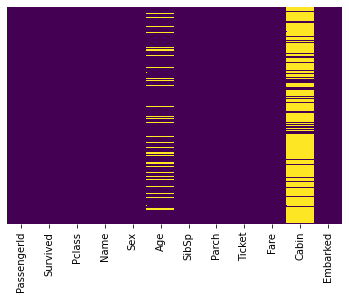

In [ ]:
# Every yellow line indicates true (meaning where we have null values)

sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

## ****  From the plot above, we can visually see that we have some null values in the "Age" and a lot more null values in "Cabin",  you will need to decide on how to deal with both of them. For instance, you may choose to exclude "Cabin" entirely from your analysis or create dummy values (zero for no information of Cabin or 1 for having Cabin information). Also, we can decide to use an aggregate of the ages to fix the missing ages. Or exclude the rows that have missing "Ages".

In [ ]:
sns.set_style('whitegrid')

# Let's get a visual idea of Survivers

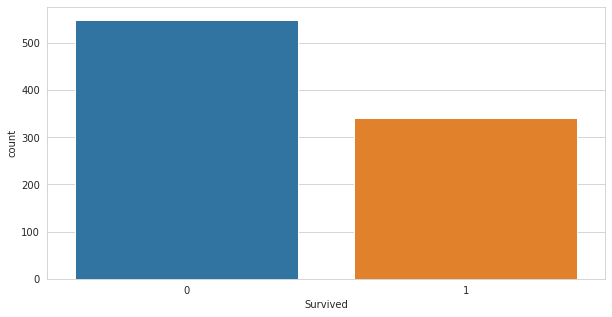

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',data=train)

# Let's get a visual idea of Survivers based on males and females

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x='Survived',hue='Sex',data=train)

NameError: ignored

### *** From the above plot, we can begin to see that there seems to be some trend. It looks like people onboard that were females were more likely to survive when compared to men. You can decide to do some further analysis on this.

# We can still do some more visual explorations on the passenger class.

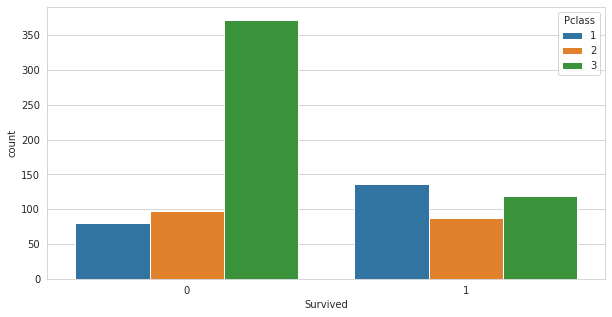

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',hue='Pclass',data=train)
plt.show()

### *** We can see some trend here also from this plot, a large majority of people in the 3rd class did not survive. This was the cheapest class to get into. We can also see that amongst the number of people that survived a good number of them came from the higher classes (1 and 2). But it would be helpful to know the number of people that were in each class.

# Let's also check the ages of people on the Titanic

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


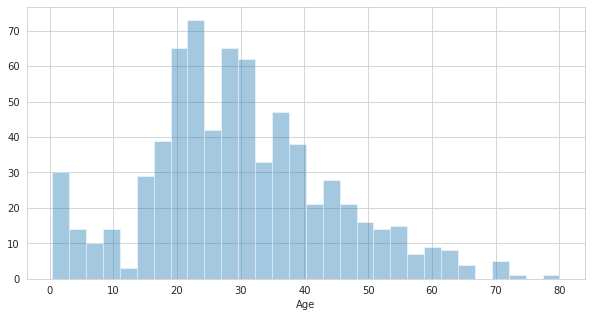

In [ ]:
# use a histogram to visualize this. We will also just drop null values for now

plt.figure(figsize=(10,5))
sns.distplot(train['Age'].dropna(),kde=False, bins =30)

### *** This is an interesting plot. We seem to have almost a bimodal distribution where we have a few children between the ages of 0 and 10. After that, we begin to get an average Age between 20 and 30.

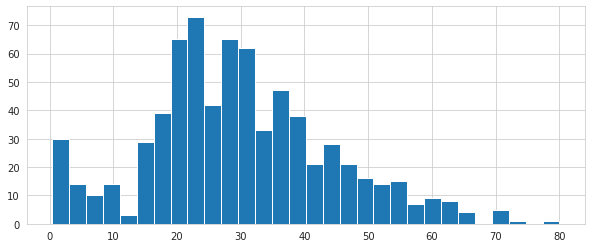

In [ ]:
# **** We can create this same plot with Matplotlib as shown below

plt.figure(figsize=(10,4))
plt.hist(train['Age'].dropna(),bins=30)

plt.show()

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Let's explore the number of siblings or spouses on board

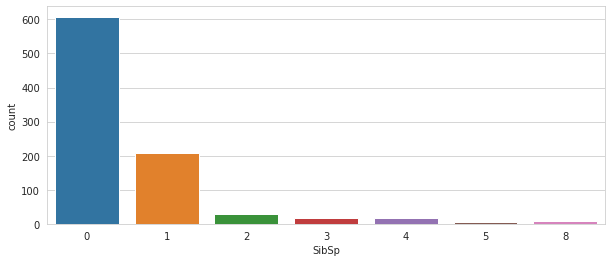

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='SibSp',data=train)

### *** From this plot, we can immediately see that most people on board did not have a sibling or a spouse on board

# We can also have a look at the "Fare". How much people paid. We can use a histogram for this

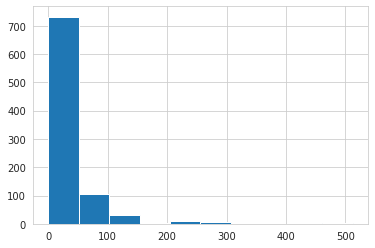

In [ ]:
train['Fare'].hist()
plt.show()

### ****With this first histogram plot above, we can see that we have a wide range of values. with a large spread between 0 and 100. WE can increase the number of bins to get some more inisght into this

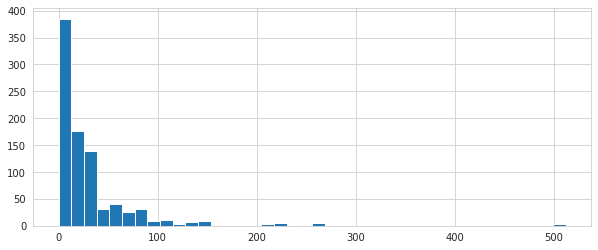

In [ ]:
train['Fare'].hist(bins=40,figsize=(10,4))
plt.show()

### *** From the above plot, we can see that a good majority of the purchases were between 0 and 50. We recall that more people in the lower class. This plot confirms that we have more people paying a lower fare.

In [ ]:
# * We can also use Seaborn to create the same plot above

plt.figure(figsize=(10,4))
sns.distplot(train['Fare'],kde=False, bins=40)

# Lets first Visualize the Ages of people in each class

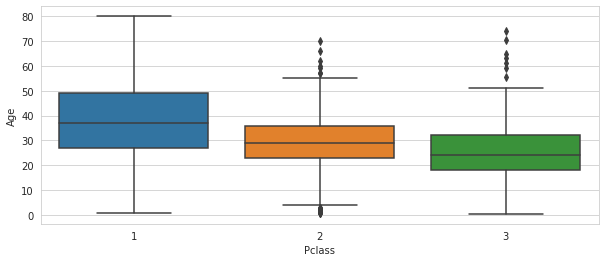

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Pclass',y='Age', data = train)
plt.show()

### ***From the plot above we can see that the wealthier people are in the higher passenger classes and they are also older. This makes sense because generally the older you are, the more disciplined  you are in wealth creation and most likely the wealthier you are

# we can fill in the null values with the average ages by passenger class

### For First Class

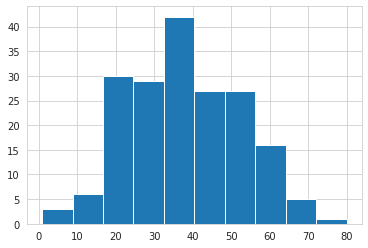

In [ ]:
plt.hist(train[train['Pclass']==1]['Age'])
plt.show()

In [ ]:
train[train['Pclass']==1]['Age'].describe()

count    186.000000
mean      38.233441
std       14.802856
min        0.920000
25%       27.000000
50%       37.000000
75%       49.000000
max       80.000000
Name: Age, dtype: float64

### For 2nd Class


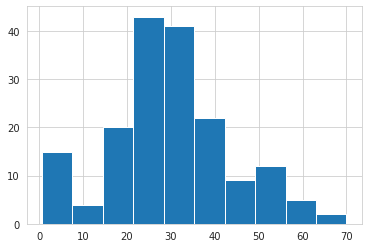

In [ ]:
plt.hist(train[train['Pclass']==2]['Age'])
plt.show()

In [ ]:
train[train['Pclass']==2]['Age'].describe()

count    173.000000
mean      29.877630
std       14.001077
min        0.670000
25%       23.000000
50%       29.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64

### for 3rd Class

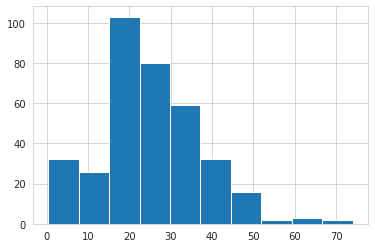

In [ ]:
plt.hist(train[train['Pclass']==3]['Age'])
plt.show()

In [ ]:
train[train['Pclass']==3]['Age'].describe()

count    355.000000
mean      25.140620
std       12.495398
min        0.420000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64

# Lets create a function

In [ ]:
#lets create a function

def fill_age(col):
    Age = col[0]
    Pclass = col[1]

    # We checking is there is a null value in Age
    if pd.isnull(Age):

        #For passengers in First class
        if Pclass == 1:
            return 37
        #For passengers in 2nd class
        elif Pclass == 2:
            return 29
        #For passengers in 3rd class
        else:
            return 24

    else:
        # if no null values, just retun our known Age value
        return Age


### Now we can use this function we just created.

   #### (1) First, we create a filtered dataframe with just  the Age and Pcalss columns in that order
   #### (2) Then we apply the function and specify that it should be on the columns (axis =1)
   #### (3) we reassign this to the 'Age' column

In [ ]:
# now we will apply our function

train['Age'] = train[['Age','Pclass']].apply(fill_age,axis=1)

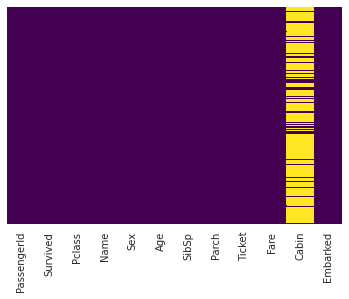

In [ ]:
# Every yellow line indicates true (meaning where we have null values)

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# We can now see that we do not have any missing values for 'Age'. However, we see that we have too many missing values for Cabin. We will drop that column.

In [ ]:
# take the train dataframe and drop the Cabin colun--- axis =1
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


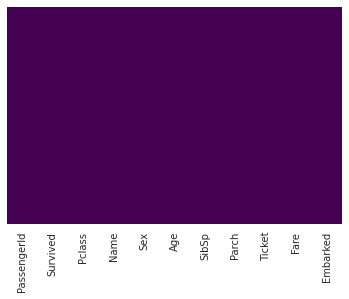

In [ ]:
# Every yellow line indicates true (meaning where we have null values)

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Now we can notice that we have just a single line indicating the missing value in 'Embarked' Column. This is so small that we can afford to exclude it from the dataframe / from our Analysis

In [ ]:
train.dropna(inplace=True)

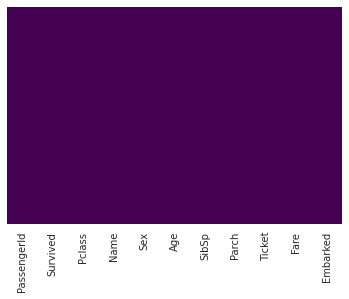

In [ ]:
# Every yellow line indicates true (meaning where we have null values)

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Consider youself as a policymaker working for an international organisation like WHO. Use the COVID-19 dataset, total_cases.csv, to visualise the change in COVID-19 cases of at least ten countries of your choice. You are free to use the EDA as per your preference as long as that is suitable for this kind of data. Try to write a short report (in about 100 words) about the similarity or differences in COVID-19 cases corresponding to these ten countries.

In [ ]:
df1=pd.read_csv('total_cases.csv')
print(df1.to_string())

           date     World  Afghanistan  Albania  Algeria  Andorra   Angola  Anguilla  Antigua and Barbuda  Argentina   Armenia   Aruba  Australia   Austria  Azerbaijan  Bahamas  Bahrain  Bangladesh  Barbados   Belarus   Belgium  Belize   Benin  Bermuda  Bhutan   Bolivia  Bonaire Sint Eustatius and Saba  Bosnia and Herzegovina  Botswana     Brazil  British Virgin Islands  Brunei  Bulgaria  Burkina Faso  Burundi  Cambodia  Cameroon    Canada  Cape Verde  Cayman Islands  Central African Republic    Chad     Chile  China   Colombia  Comoros   Congo  Costa Rica  Cote d'Ivoire   Croatia    Cuba  Curacao  Cyprus  Czech Republic  Democratic Republic of Congo  Denmark  Djibouti  Dominica  Dominican Republic   Ecuador     Egypt  El Salvador  Equatorial Guinea  Eritrea  Estonia  Ethiopia  Faeroe Islands  Falkland Islands  Fiji  Finland     France  French Polynesia   Gabon  Gambia   Georgia   Germany    Ghana  Gibraltar   Greece  Greenland  Grenada    Guam  Guatemala  Guernsey   Guinea  Guinea-Bis